# SHUBHAM SHARMA
## IIT BOMBAY
This code will use the network that we trained and then give us the P0, P1, P2 and the bounding boxes

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# For plotting, arrays and other things
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import pandas as pd
from skimage import io
import cv2
from tqdm import tqdm
import selectivesearch

#For Deep learning 
import keras
from keras import callbacks 
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.optimizers import RMSprop,SGD, adam #Optimizers
from keras import backend as K

In [3]:
# !pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp36-none-any.whl size=4359 sha256=6797f7e28e3c7a77f2daa4daf2ebbddb0ce0a965ac3a666f8a462dfe0c1d304d
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


In [0]:
path_drive = 'gdrive/My Drive/Project IE 643/IE-643 Data/'
path_image = 'gdrive/My Drive/Project IE 643/IE-643 Data/train-images-boxable-with-rotation.csv'
path_annotation = 'gdrive/My Drive/Project IE 643/IE-643 Data/train-annotations-bbox.csv'
path_description = 'gdrive/My Drive/Project IE 643/IE-643 Data/class-descriptions-boxable.csv'
path_subcar_url =  'gdrive/My Drive/Project IE 643/IE-643 Data/subcar_img_url.csv'
path_subperson_url =  'gdrive/My Drive/Project IE 643/IE-643 Data/subperson_img_url.csv'
path_subphone_url =  'gdrive/My Drive/Project IE 643/IE-643 Data/subphone_img_url.csv'


##


car_images_boxable = pd.read_csv(path_subcar_url)
# print(car_images_boxable.head())

person_images_boxable = pd.read_csv(path_subperson_url)
# print(person_images_boxable.head())

phone_images_boxable = pd.read_csv(path_subphone_url)
# print(phone_images_boxable.head())

annotations_bbox = pd.read_csv(path_annotation)
# print(annotations_bbox.head())

class_description = pd.read_csv(path_description)
# print(class_description.head())



In [0]:
def network(width = 256, height = 256, depth = 3, classes_net1 = 2, classes_net2 = 4,weightsPath=None):
  bn_flag = True
  inputs = Input((width, height , depth))
  conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
  conv1 = BatchNormalization(axis = -1)(conv1,training=bn_flag)
  conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
  conv1 = BatchNormalization(axis= -1)(conv1,training=bn_flag)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  ##
  conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
  conv2 = BatchNormalization(axis = -1)(conv2,training=bn_flag)
  conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
  conv2 = BatchNormalization(axis= -1)(conv2,training=bn_flag)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  ##
  conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
  conv3 = BatchNormalization(axis = -1)(conv3,training=bn_flag)
  conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
  conv3 = BatchNormalization(axis = -1)(conv3,training=bn_flag)
  conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
  conv3 = BatchNormalization(axis = -1)(conv3,training=bn_flag)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  ##
  conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
  conv4 = BatchNormalization(axis = -1)(conv4,training=bn_flag)
  conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
  conv4 = BatchNormalization(axis = -1)(conv4,training=bn_flag)
  conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
  conv4 = BatchNormalization(axis = -1)(conv4,training=bn_flag)
  pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
  ##
  conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
  conv5 = BatchNormalization(axis = -1)(conv5,training=bn_flag)
  conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
  conv5 = BatchNormalization(axis = -1)(conv5,training=bn_flag)
  conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
  conv5 = BatchNormalization(axis = -1)(conv5,training=bn_flag)
  pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
  ##
  Y = Flatten()(pool5)
  
  #For the first type of output
  out_net1 = Dense(512, activation='relu')(Y)
  out_net1 = Dense(512, activation='relu')(out_net1)
  out_net1 = Dense(512, activation='relu')(out_net1)
  out_net1 = Dense(classes_net1 , activation='softmax')(out_net1)  

  #For the first type of output
  out_net2 = Dense(512, activation='relu')(Y)
  out_net2 = Dense(512, activation='relu')(out_net2)
  out_net2 = Dense(512, activation='relu')(out_net2)
  out_net2 = Dense(classes_net2 , activation='softmax')(out_net2)

  model = Model(inputs=[inputs], outputs=[out_net1, out_net2])
  
  if weightsPath is not None:
    model.load_weights(weightsPath)
    
  print(model.summary())
  return model 


In [0]:
path2data = 'gdrive/My Drive/Project IE 643/IE-643 Data/'
classes_net1 , classes_net2 = 2 , 4

X = np.load(path2data + 'X.npy')
Y_net1 = np.load(path2data + 'Y_net1.npy')
Y_net2 = np.load(path2data + 'Y_net2.npy')
score = np.load(path2data + 'score.npy')

In [23]:
model = network(weightsPath = 'gdrive/My Drive/Project IE 643/model.h5')
opt = adam(lr=1e-5)
#Set the compiler parameter for the training
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["categorical_accuracy"],sample_weight_mode='auto')












Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       batch_normalization_1[0][0]      
_________________________________________________________________________________

In [0]:

for i in range(41):
  print(i, model.layers[i])


0 <keras.engine.input_layer.InputLayer object at 0x7f5c9fbc3278>
1 <keras.layers.convolutional.Conv2D object at 0x7f5c1d4515c0>
2 <keras.layers.normalization.BatchNormalization object at 0x7f5c1d451908>
3 <keras.layers.convolutional.Conv2D object at 0x7f5c1d451a58>
4 <keras.layers.normalization.BatchNormalization object at 0x7f5c16767b38>
5 <keras.layers.pooling.MaxPooling2D object at 0x7f5c100bef60>
6 <keras.layers.convolutional.Conv2D object at 0x7f5c100d7cf8>
7 <keras.layers.normalization.BatchNormalization object at 0x7f5c100f3b70>
8 <keras.layers.convolutional.Conv2D object at 0x7f5c100f9e48>
9 <keras.layers.normalization.BatchNormalization object at 0x7f5c1009b828>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f5c1009b978>
11 <keras.layers.convolutional.Conv2D object at 0x7f5c10069438>
12 <keras.layers.normalization.BatchNormalization object at 0x7f5c1006ff60>
13 <keras.layers.convolutional.Conv2D object at 0x7f5c1006fef0>
14 <keras.layers.normalization.BatchNormalization ob

As we need output of conv2,conv3,conv4, the correspong i in layers is: 9,16,23



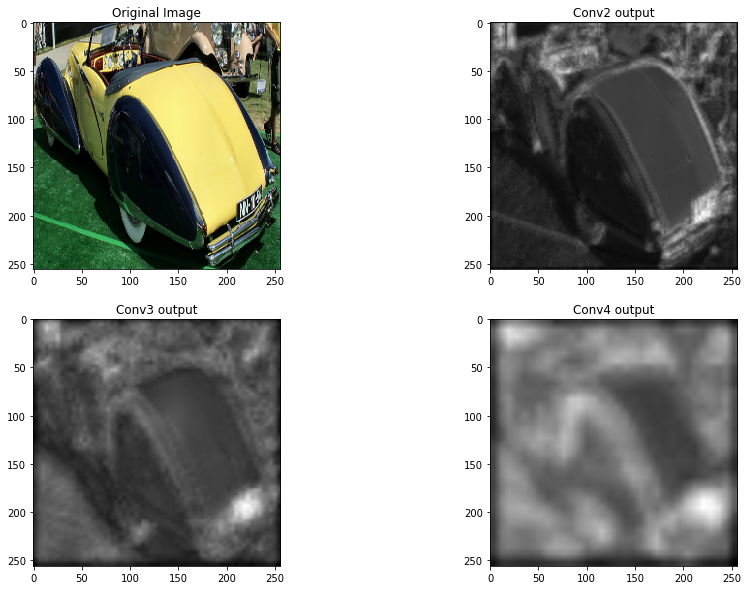

In [0]:
dim = (256,256)
inp = model.input                                      # input placeholder
outputs = [model.layers[9].output, model.layers[16].output, model.layers[23].output]    
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
test = X[0]/255.
test = test.reshape((1, test.shape[0], test.shape[1], test.shape[2]))
layer_outs = [func([test]) for func in functors]
layer_outs_mean = [np.mean(z[0], axis = 3) for z in layer_outs]

layer_outs_mean = [np.mean(z[0], axis = 3) for z in layer_outs] #each output is of the format (1, a,b), let us convert it into (a,b,1) and then reshape it to 256,256,1
layer_outs_mean = [np.reshape(z, (z.shape[1], z.shape[2], z.shape[0]) ) for z in layer_outs_mean] # Made them channel last. Lets now resize them
layer_outs_resized = [cv2.resize(z,dim ) for z in layer_outs_mean]

#Let us make plots for ppt and report
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(X[0])
##
plt.subplot(2,2,2)
plt.title('Conv2 output')
plt.imshow(layer_outs_resized[0])
plt.gray()
##
plt.subplot(2,2,3)
plt.title('Conv3 output')
plt.imshow(layer_outs_resized[1])
plt.gray()
##
plt.subplot(2,2,4)
plt.title('Conv4 output')
plt.imshow(layer_outs_resized[2])
plt.gray()

In [0]:
dim = (256, 256)
inp = model.input                                      # input placeholder
outputs = [model.layers[9].output, model.layers[16].output, model.layers[23].output]    
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

score = []
# Testing
for i in tqdm(range(len(X))):
  # i = 801
  test = X[i]/255.
  test = test.reshape((1, test.shape[0], test.shape[1], test.shape[2]))
  layer_outs = [func([test]) for func in functors]
  layer_outs_mean = [np.mean(z[0], axis = 3) for z in layer_outs] #each output is of the format (1, a,b), let us convert it into (a,b,1) and then reshape it to 256,256,1
  layer_outs_mean = [np.reshape(z, (z.shape[1], z.shape[2], z.shape[0]) ) for z in layer_outs_mean] # Made them channel last. Lets now resize them
  layer_outs_resized = [cv2.resize(z,dim ) for z in layer_outs_mean]
  sum_of_layers = sum(layer_outs_resized)
  # sum_of_layers = (sum_of_layers - np.min(sum_of_layers))/(np.max(sum_of_layers) - np.min(sum_of_layers))
  # edge = cv2.Canny(sum_of_layers, 100, 200)

  # print(np.mean(sum_of_layers))
  # sum_of_layers = cv2.cvtColor(sum_of_layers, cv2.COLOR_GRAY2RGB)
  # structure   = 'gdrive/My Drive/Project IE 643/IE-643 Data/model.yml'
  # retval = cv2.ximgproc.createStructuredEdgeDetection(structure)
  # out = retval.detectEdges(sum_of_layers)
  score.append(np.mean(sum_of_layers))
# score.append(np.mean(out))
# np.save('gdrive/My Drive/Project IE 643/IE-643 Data/score.npy',score)
# plt.imshow(X[i])


100%|██████████| 881/881 [01:01<00:00, 14.36it/s]


In [0]:
np.min(score[224+117+281:])

0.0002393797

The number of car images are 224

The number of phone images are 117

The number of person images are  281

The number of object images are  622

The threshold for 


car:0.00023940206

phone:0.00023940159

person:0.00023940206

overall threshold:0.00023940159

Let us make a code to generate first P0 and then P1

In [0]:
def generate_p0(img):
  img_lbl, regions = selectivesearch.selective_search(img, scale=50, sigma=0.8, min_size=500)
  return regions

def Plot_Proposal(img, regions):
  plt.figure(figsize=(15,10))
  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(img)
  img_bbox = img.copy()
  for i in range(len(regions)):
      (x,y,width,height) = regions[i]['rect']
      xmin = x
      ymin = y
      xmax = x + width
      ymax = y + height
      # (xmin,ymin,xmax,ymax) = regions[i]['rect']
      cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
  plt.subplot(1,2,2)
  plt.title('Image with Sliding window Bounding Boxes')
  plt.imshow(img_bbox)

In [0]:
ind = 3
img_name = phone_images_boxable['ImageID'][ind]
img_url = phone_images_boxable['Thumbnail300KURL'][ind]
img = io.imread(img_url)

P0 = generate_p0(img)


In [0]:

def generate_p1(img, P0):
  dim = (256, 256)
  inp = model.input                                      # input placeholder
  outputs = [model.layers[9].output, model.layers[16].output, model.layers[23].output]    
  functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions
  P1 = {}
  c = 0
  for i in tqdm(range(len(P0))):
    (x,y,width,height) = P0[i]['rect']
    xmin = x
    ymin = y
    xmax = x + width
    ymax = y + height
    new_image = img[ymin:ymax , xmin:xmax]
    try:
      resized_image = cv2.resize(new_image,dim)
      resized_image = np.reshape(resized_image, (1, 256, 256, 3))/ 255.
      test = resized_image
      layer_outs = [func([test]) for func in functors]
      layer_outs_mean = [np.mean(z[0], axis = 3) for z in layer_outs] #each output is of the format (1, a,b), let us convert it into (a,b,1) and then reshape it to 256,256,1
      layer_outs_mean = [np.reshape(z, (z.shape[1], z.shape[2], z.shape[0]) ) for z in layer_outs_mean] # Made them channel last. Lets now resize them
      layer_outs_resized = [cv2.resize(z,dim ) for z in layer_outs_mean]
      sum_of_layers = sum(layer_outs_resized)
      edge_score = np.mean(sum_of_layers)
      P0[i]['score'] = edge_score
      if edge_score>=0.00023940159:
        P1[c] = P0[i]
        c+=1
      # print (P0[i])
    except Exception as e:
      pass
  return P1


In [90]:
P1 = generate_p1(img,P0)


100%|██████████| 227/227 [00:16<00:00, 13.65it/s]


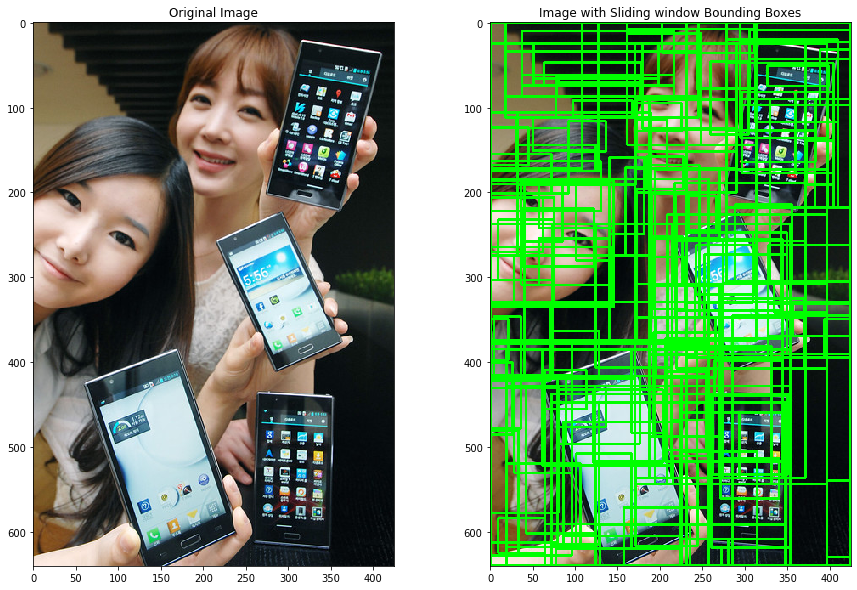

In [91]:
Plot_Proposal(img, P1)

In [0]:
def generate_p2(img, P1):
  dim = (256, 256)
  P2 = {}
  c = 0
  for i in tqdm(range(len(P1))):
    (x,y,width,height) = P1[i]['rect']
    xmin = x
    ymin = y
    xmax = x + width
    ymax = y + height
    new_image = img[ymin:ymax , xmin:xmax]
    try:
      resized_image = cv2.resize(new_image,dim)
      resized_image = np.reshape(resized_image, (1, 256, 256, 3))/ 255.
      q,w = model.predict(resized_image)
      edge_score = q[0][1]
      # print(edge_score)
      if edge_score <=0.9999:
        P2[c] = P1[i]
        c+=1
    except Exception as e:
      pass
  return P2


In [93]:
P2 = generate_p2(img, P1)

100%|██████████| 227/227 [00:07<00:00, 28.59it/s]


34


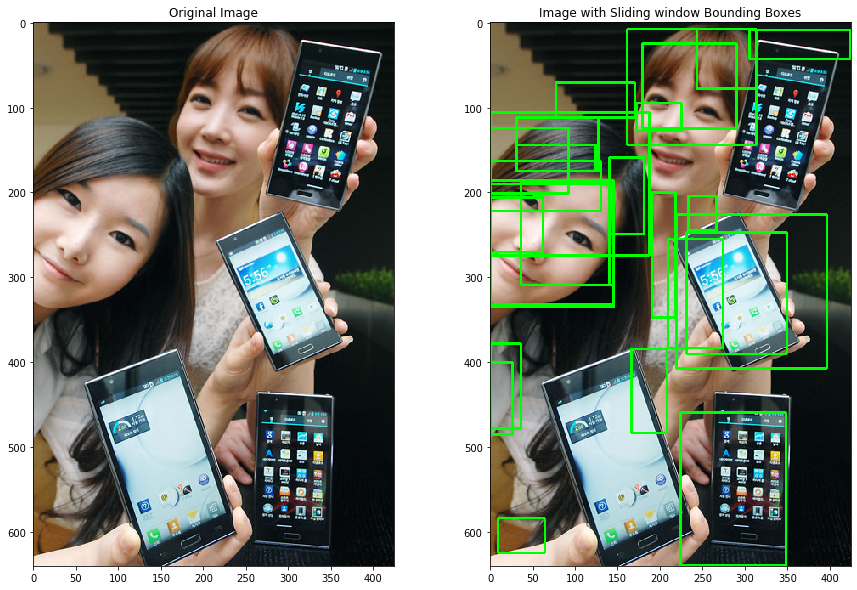

In [94]:
print(len(P2))
Plot_Proposal(img, P2)

In [0]:
def generate_prediction(img, P2):
  dim = (256, 256)
  P = {}
  c = 0  
  for i in tqdm(range(len(P2))):
    (x,y,width,height) = P2[i]['rect']
    xmin = x
    ymin = y
    xmax = x + width
    ymax = y + height
    new_image = img[ymin:ymax , xmin:xmax]
    try:
      resized_image = cv2.resize(new_image,dim)
      resized_image = np.reshape(resized_image, (1, 256, 256, 3))/ 255.
      q,w = model.predict(resized_image)
      edge_cord = np.argmax(w[0])
      # print(edge_score)
      if edge_cord !=0:
        P[c] = P2[i]
        c+=1
    except Exception as e:
      pass
  return P



In [96]:
P =generate_prediction(img, P2)

100%|██████████| 34/34 [00:01<00:00, 26.30it/s]


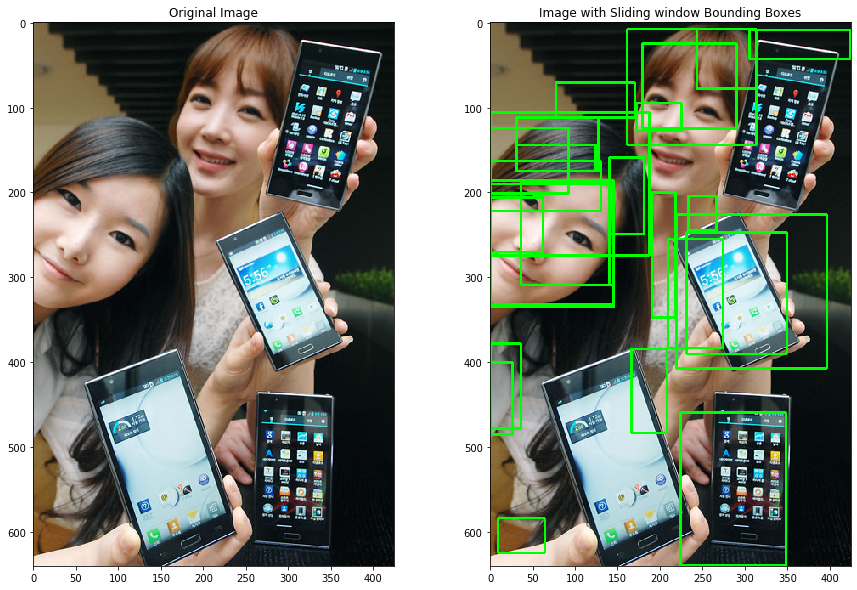

In [97]:
Plot_Proposal(img, P)

In [27]:
person_car = cv2.imread('./person_car.jpg')
person_phone = cv2.imread('./person_phone.jpg')
person_car = cv2.cvtColor(person_car, cv2.COLOR_BGR2RGB)
person_phone = cv2.cvtColor(person_phone, cv2.COLOR_BGR2RGB)
print(np.max(person_car),np.min(person_car),np.max(person_phone),np.min(person_car))
person_car = person_car/255.
person_phone = person_phone/255.
print(np.max(person_car),np.min(person_car),np.max(person_phone),np.min(person_car))
print(person_car.shape, person_phone.shape)
dim = (246 , 400)
person_car = cv2.resize(person_car,dim)

255 0 255 0
1.0 0.0 1.0 0.0
(2461, 4000, 3) (159, 318, 3)


In [0]:
# For person and car
P0 = generate_p0(person_car)

100%|██████████| 85/85 [00:06<00:00, 14.11it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


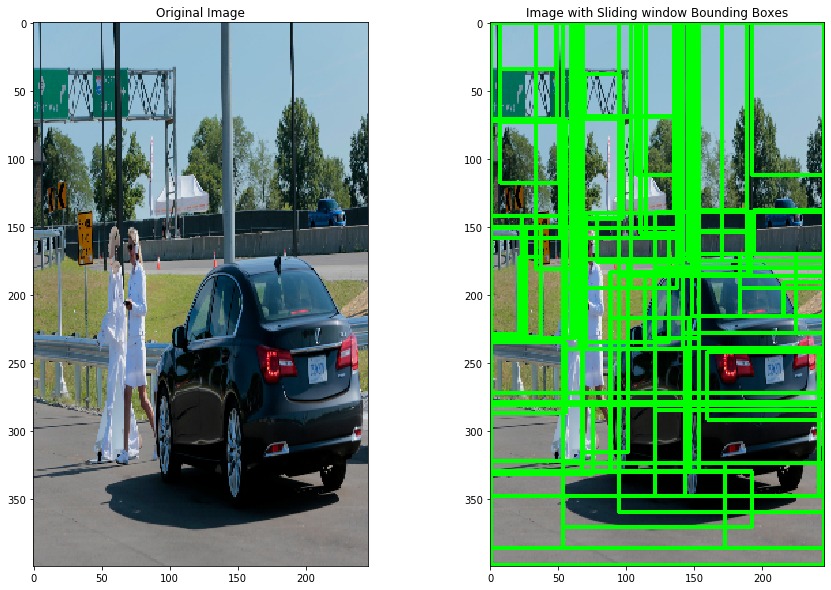

In [29]:
P1 = generate_p1(person_car,P0)
Plot_Proposal(person_car, P1)

100%|██████████| 85/85 [00:06<00:00, 14.06it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


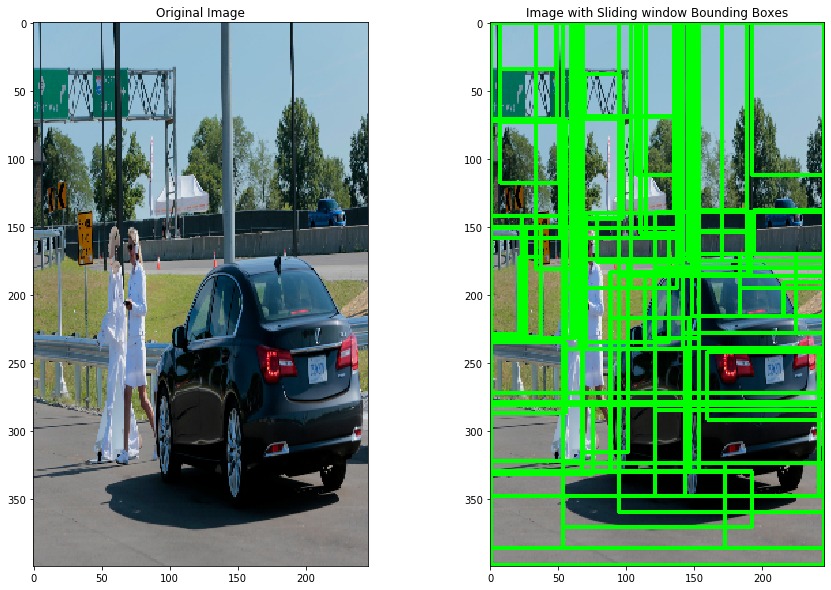

In [30]:
P2 =generate_p1(person_car, P1)
Plot_Proposal(person_car, P2)

100%|██████████| 85/85 [00:03<00:00, 27.04it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


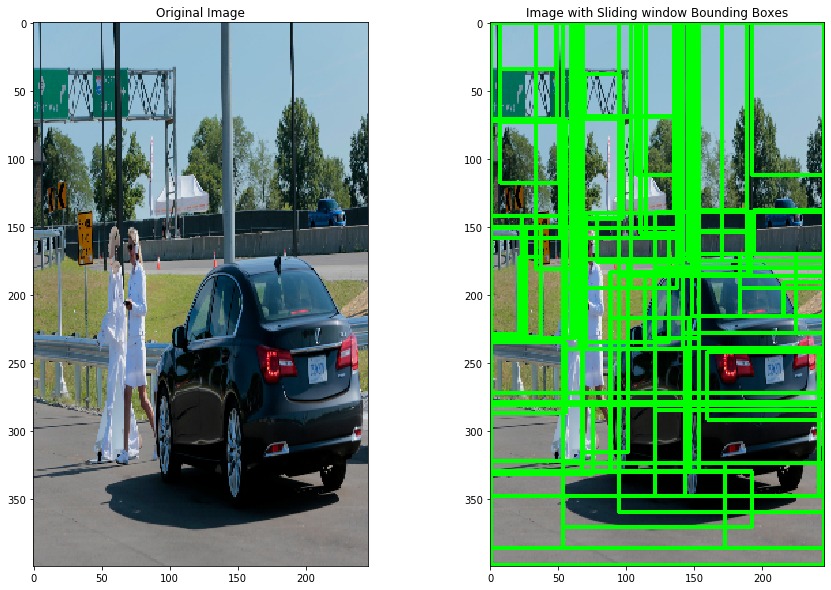

In [31]:
P =generate_prediction(person_car, P2)
Plot_Proposal(person_car, P)

100%|██████████| 63/63 [00:04<00:00, 14.11it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


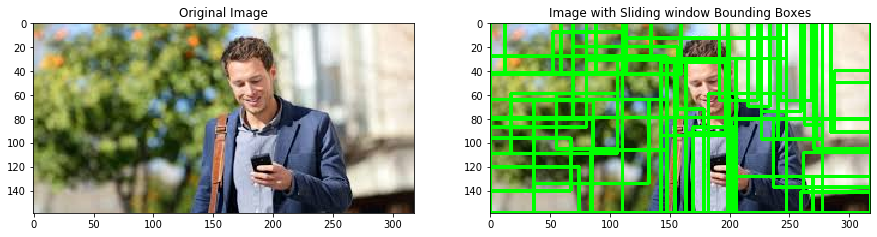

In [32]:
# For person and car
P0 = generate_p0(person_phone)
P1 = generate_p1(person_phone,P0)
Plot_Proposal(person_phone, P1)

100%|██████████| 63/63 [00:04<00:00, 14.23it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


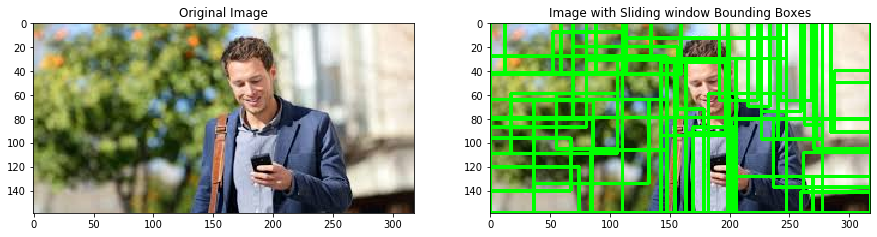

In [33]:
P2 =generate_p1(person_phone, P1)
Plot_Proposal(person_phone, P2)

100%|██████████| 63/63 [00:02<00:00, 27.55it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


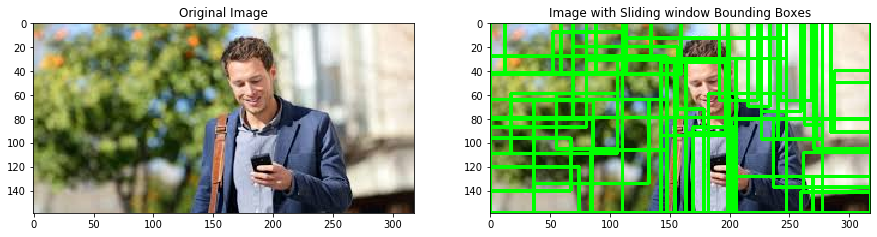

In [34]:
P =generate_prediction(person_phone, P2)
Plot_Proposal(person_phone, P)